In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats#for statistical asnlysis
import nltk
data = pd.read_csv('D:\JOY\J AMITY\Machine Learning/Electric_Vehicle_Population_Data.csv')
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173533 entries, 0 to 173532
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         173533 non-null  object 
 1   County                                             173528 non-null  object 
 2   City                                               173528 non-null  object 
 3   State                                              173533 non-null  object 
 4   Postal Code                                        173528 non-null  float64
 5   Model Year                                         173533 non-null  int64  
 6   Make                                               173533 non-null  object 
 7   Model                                              173533 non-null  object 
 8   Electric Vehicle Type                              173533 non-null  object

In [45]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 376
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

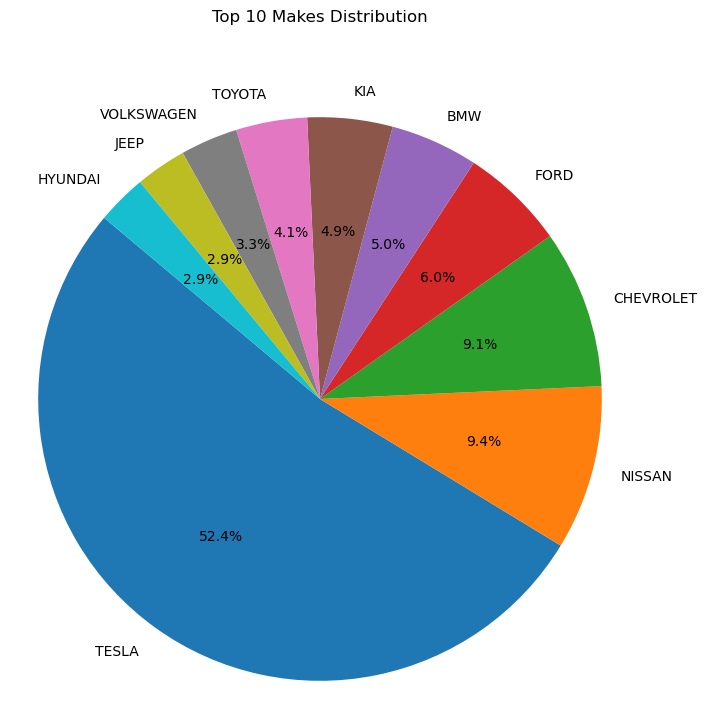

In [2]:
channel_counts = data['Make'].value_counts()

top_10_makes = channel_counts.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_makes, labels=top_10_makes.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Makes Distribution', y=1.1)
plt.axis('equal')
plt.show()

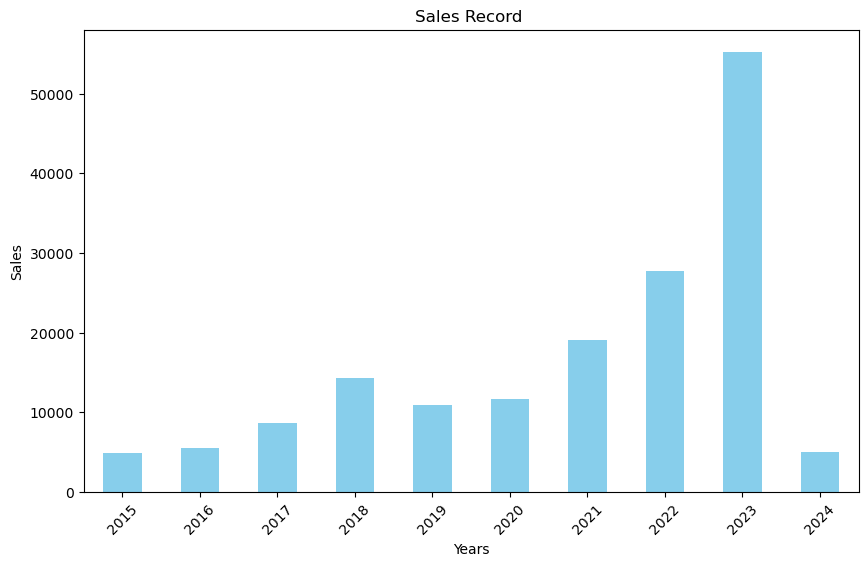

In [3]:
year_counts = data['Model Year'].value_counts()

top_10_years = year_counts.head(10)

top_10_years_sorted = top_10_years.sort_index()

plt.figure(figsize=(10, 6))
top_10_years_sorted.plot(kind='bar', color='skyblue')
plt.title('Sales Record ')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

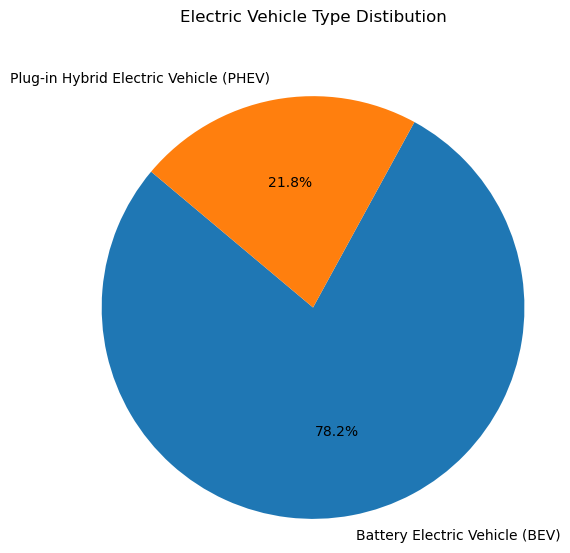

In [4]:
channel_counts = data['Electric Vehicle Type'].value_counts()

top_10_makes = channel_counts.head(10)

plt.figure(figsize=(6, 6))
plt.pie(top_10_makes, labels=top_10_makes.index, autopct='%1.1f%%', startangle=140)
plt.title('Electric Vehicle Type Distibution', y=1.1)
plt.axis('equal')
plt.show()

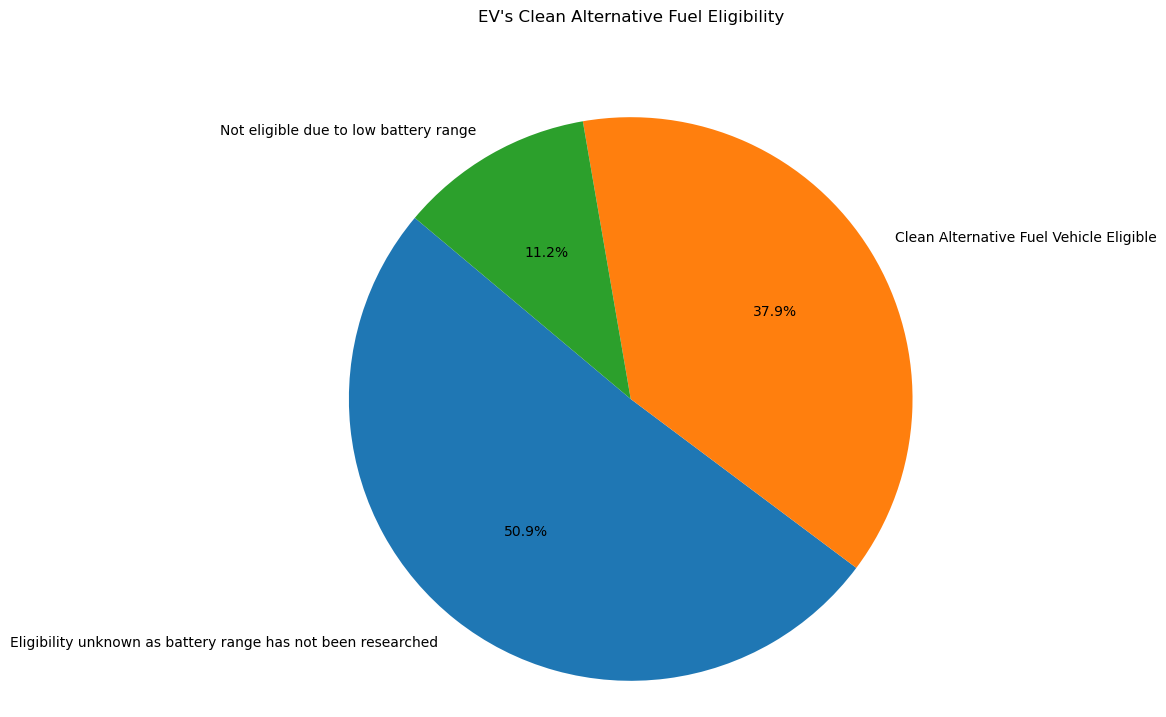

In [52]:
channel_counts = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

top_10_makes = channel_counts.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_makes, labels=top_10_makes.index, autopct='%1.1f%%', startangle=140)
plt.title("EV's Clean Alternative Fuel Eligibility", y=1.1)
plt.axis('equal')
plt.show()

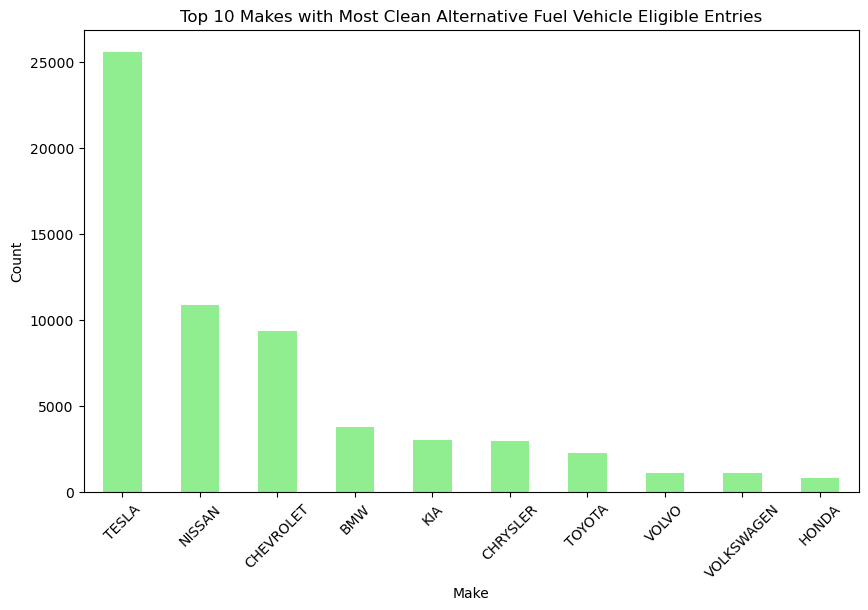

In [51]:
eligible_data = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible']

make_counts = eligible_data['Make'].value_counts()

top_10_makes = make_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_makes.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Makes with Most Clean Alternative Fuel Vehicle Eligible Entries')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


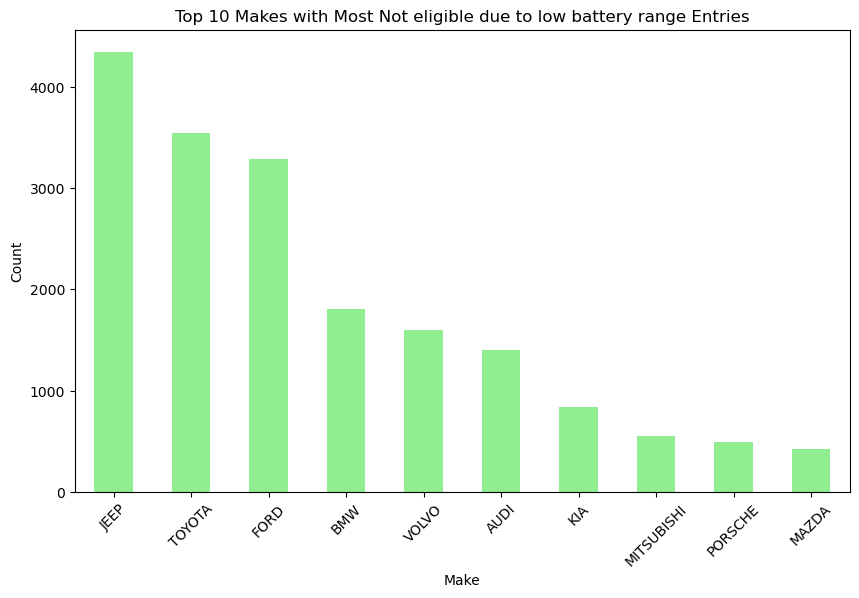

In [50]:
eligible_data = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range']

make_counts = eligible_data['Make'].value_counts()

top_10_makes = make_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_makes.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Makes with Most Not eligible due to low battery range Entries')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


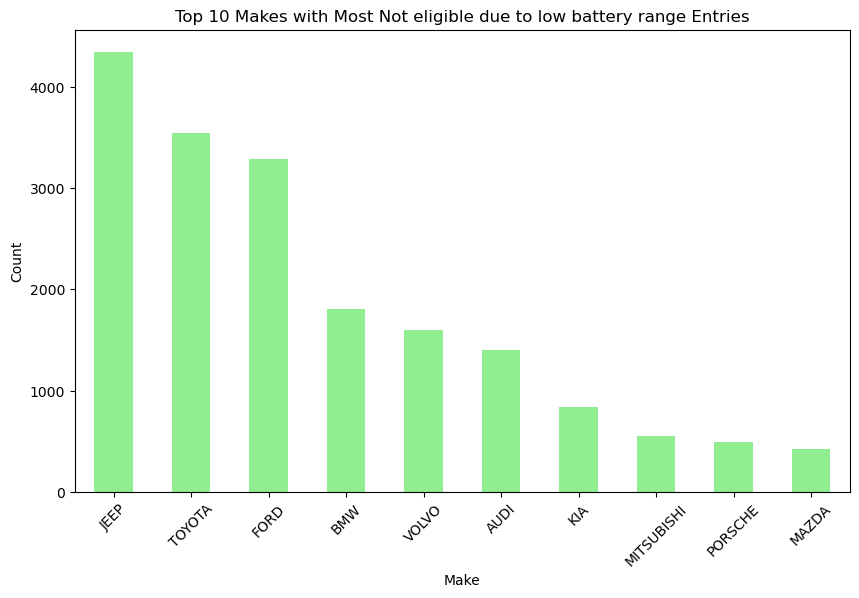

In [49]:
eligible_data = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range']

make_counts = eligible_data['Make'].value_counts()

top_10_makes = make_counts.head(10)

# Create a bar graph for the top 10 makes
plt.figure(figsize=(10, 6))
top_10_makes.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Makes with Most Not eligible due to low battery range Entries')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


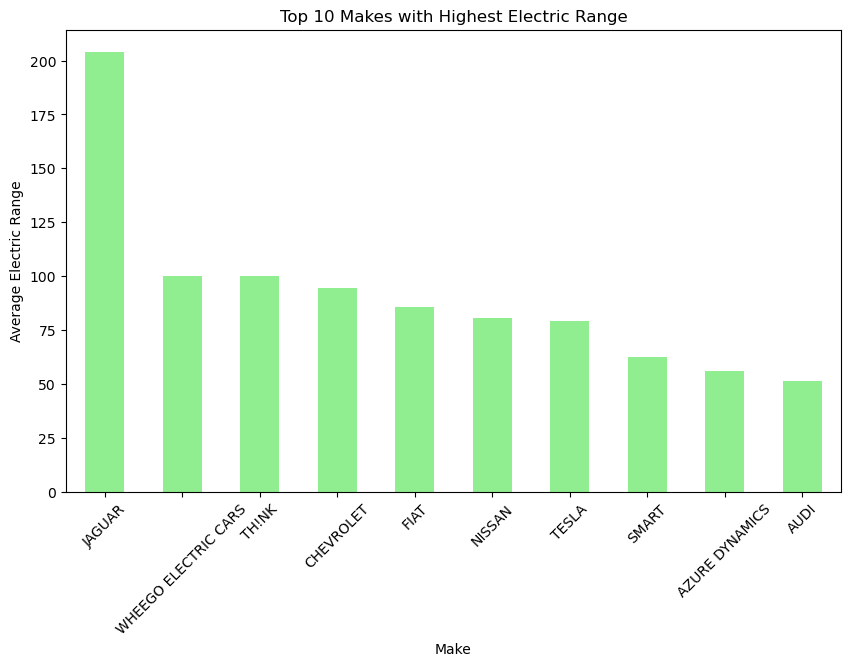

In [48]:
average_range_by_make = data.groupby('Make')['Electric Range'].mean()

top_10_makes_range = average_range_by_make.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_makes_range.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Makes with Highest Electric Range')
plt.xlabel('Make')
plt.ylabel('Average Electric Range')
plt.xticks(rotation=45)
plt.show()


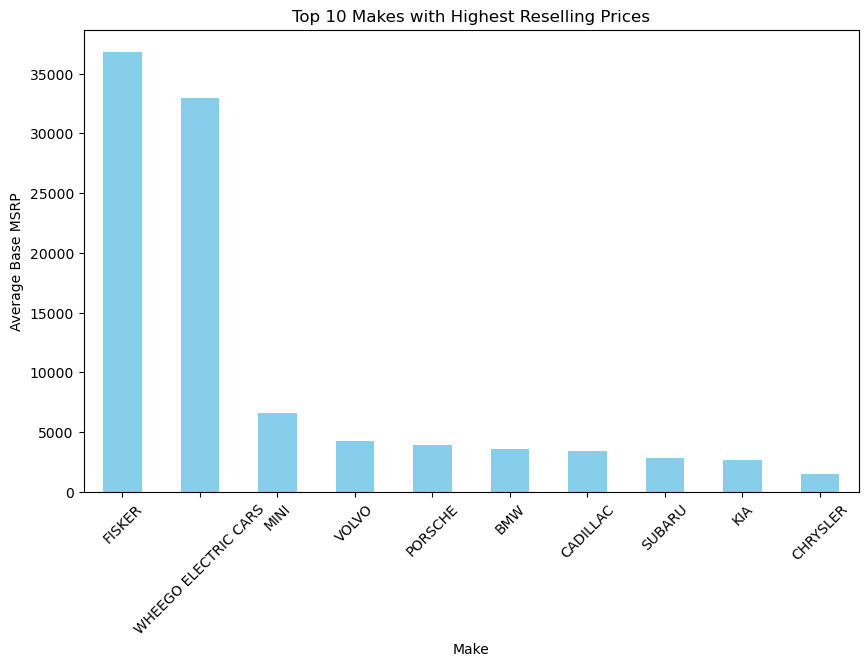

In [47]:
average_msrp_by_make = data.groupby('Make')['Base MSRP'].mean()

top_10_makes = average_msrp_by_make.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_makes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Makes with Highest Reselling Prices')
plt.xlabel('Make')
plt.ylabel('Average Base MSRP')
plt.xticks(rotation=45)
plt.show()


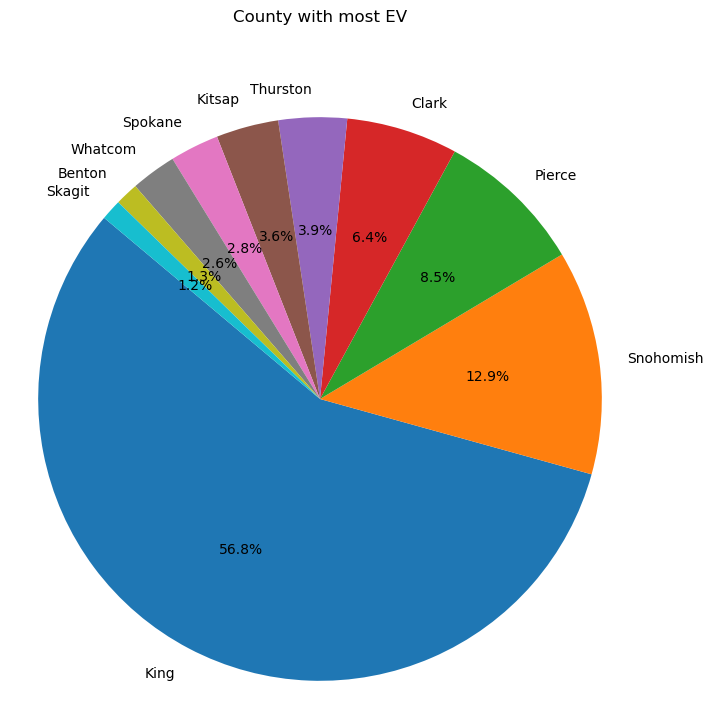

In [15]:
channel_counts = data['County'].value_counts()

top_10_makes = channel_counts.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_makes, labels=top_10_makes.index, autopct='%1.1f%%', startangle=140)
plt.title('County with most EV', y=1.1)
plt.axis('equal')
plt.show()

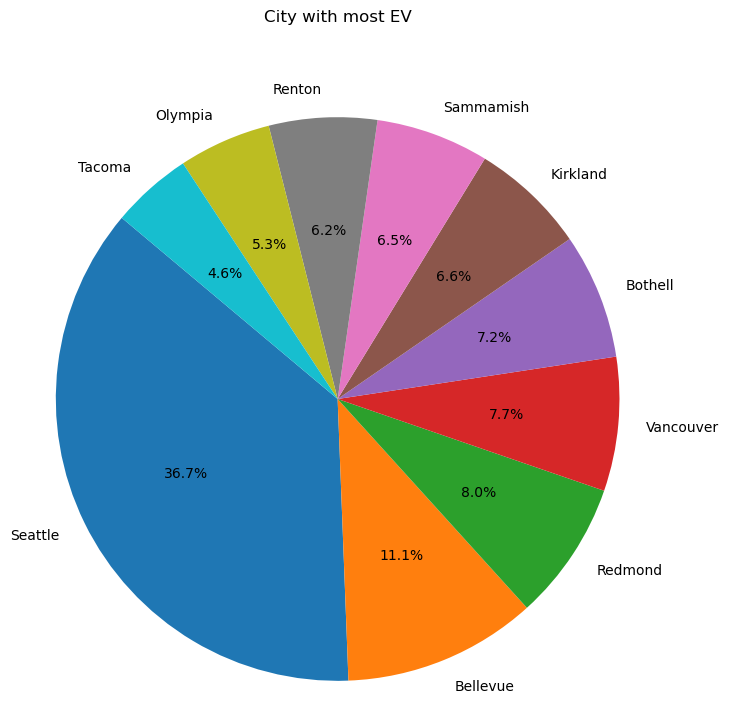

In [14]:
channel_counts = data['City'].value_counts()

top_10_makes = channel_counts.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_makes, labels=top_10_makes.index, autopct='%1.1f%%', startangle=140)
plt.title('City with most EV', y=1.1)
plt.axis('equal')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_14280\972886823.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping labels


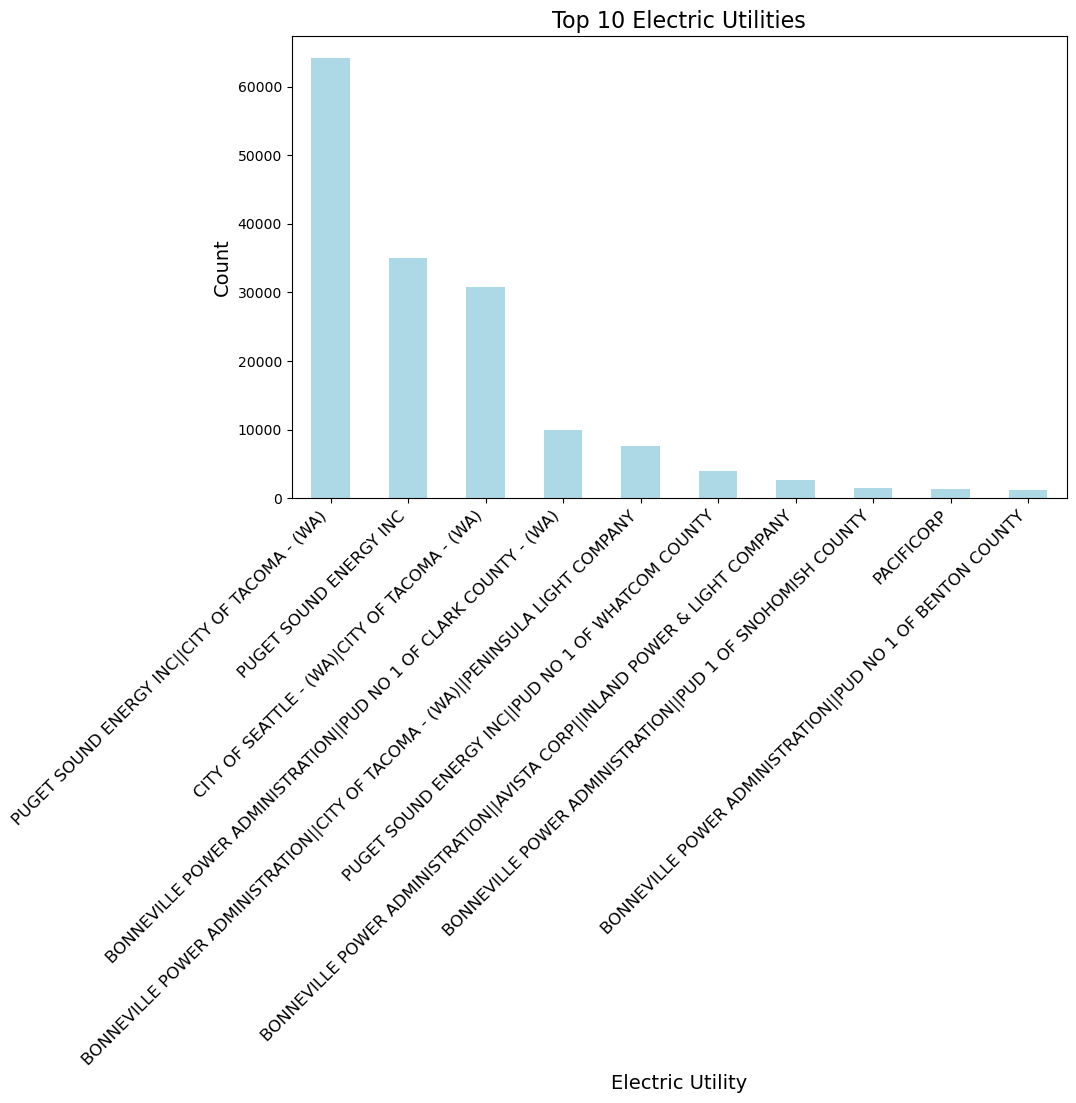

In [46]:
utility_counts = data['Electric Utility'].value_counts()

top_10_utilities = utility_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_utilities.plot(kind='bar', color='lightblue')
plt.title('Top 10 Electric Utilities', fontsize=16)  
plt.xlabel('Electric Utility', fontsize=14) 
plt.ylabel('Count', fontsize=14) 
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.tight_layout() 
plt.show()
